<a href="https://colab.research.google.com/github/leoniedyt/Project-DSML/blob/Project_dsml/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df_interactions_train = pd.read_csv('https://raw.githubusercontent.com/leoniedyt/Project-DSML/refs/heads/Project_dsml/Data/interactions_train.csv')
display(df_interactions_train.head())
df_interactions_train.shape

,u,i,t
0,4456,8581,1.687541e+09
1,142,1964,1.679585e+09
2,362,3705,1.706872e+09
3,1809,11317,1.673533e+09
4,4384,1323,1.681402e+09


(87047, 3)

In [ ]:
df_interactions_train.rename(columns={'u': 'user_id', 'i': 'item_id', 't': 'timestamp'}, inplace=True)
df_interactions_train.head()

,user_id,item_id,timestamp
0,4456,8581,1.687541e+09
1,142,1964,1.679585e+09
2,362,3705,1.706872e+09
3,1809,11317,1.673533e+09
4,4384,1323,1.681402e+09


In [ ]:
df_items = pd.read_csv('https://raw.githubusercontent.com/leoniedyt/Project-DSML/refs/heads/Project_dsml/Data/items.csv')
display(df_items.head())
df_items.shape

,Title,Author,ISBN Valid,Publisher,Subjects,i
0,Classification décimale universelle : édition ...,NaN,9782871303336; 2871303339,Ed du CEFAL,Classification décimale universelle; Indexatio...,0
1,Les interactions dans l'enseignement des langu...,"Cicurel, Francine, 1947-",9782278058327; 2278058320,Didier,didactique--langue étrangère - enseignement; d...,1
2,Histoire de vie et recherche biographique : pe...,NaN,2343190194; 9782343190198,L'Harmattan,Histoires de vie en sociologie; Sciences socia...,2
3,Ce livre devrait me permettre de résoudre le c...,"Mazas, Sylvain, 1980-",9782365350020; 236535002X; 9782365350488; 2365...,Vraoum!,Moyen-Orient; Bandes dessinées autobiographiqu...,3
4,Les années glorieuses : roman /,"Lemaitre, Pierre, 1951-",9782702180815; 2702180817; 9782702183618; 2702...,Calmann-Lévy,France--1945-1975; Roman historique; Roman fra...,4


(15291, 6)

❌**ISBN ca veut dire qu'il y a potentiellement plusieurs publications du même livre, peut être un problème pour l'exploration des données **
✅ Du coup c'est bon mais on doit utiliser i et pas ISBN Valid (peut être drop la colonne)

In [ ]:
df_items.rename(columns={'i': 'item_id'}, inplace= True)
df_items.drop(columns=["ISBN Valid"], axis=1, inplace=True)
display(df_items.head())

,Title,Author,Publisher,Subjects,item_id
0,Classification décimale universelle : édition ...,NaN,Ed du CEFAL,Classification décimale universelle; Indexatio...,0
1,Les interactions dans l'enseignement des langu...,"Cicurel, Francine, 1947-",Didier,didactique--langue étrangère - enseignement; d...,1
2,Histoire de vie et recherche biographique : pe...,NaN,L'Harmattan,Histoires de vie en sociologie; Sciences socia...,2
3,Ce livre devrait me permettre de résoudre le c...,"Mazas, Sylvain, 1980-",Vraoum!,Moyen-Orient; Bandes dessinées autobiographiqu...,3
4,Les années glorieuses : roman /,"Lemaitre, Pierre, 1951-",Calmann-Lévy,France--1945-1975; Roman historique; Roman fra...,4


In [ ]:
df_submissions= pd.read_csv('https://raw.githubusercontent.com/leoniedyt/Project-DSML/refs/heads/Project_dsml/Data/sample_submission.csv')
display(df_submissions.head())
df_submissions.shape

,user_id,recommendation
0,0,3758 11248 9088 9895 5101 6074 9295 14050 1096...
1,1,3263 726 1589 14911 6432 10897 6484 7961 8249 ...
2,2,13508 9848 12244 2742 11120 2893 2461 5439 116...
3,3,2821 10734 6357 5934 2085 12608 12539 10551 10...
4,4,12425 219 11602 1487 14178 489 13888 2110 4413...


(7838, 2)

# 1. Data cleaning:

In [ ]:
# Conversion du timestamp en datetime (si ce n'est pas déjà fait dans l'analyse temporelle)
df_interactions_train['datetime'] = pd.to_datetime(df_interactions_train['timestamp'], unit='s')
# Supprimer la colonne 't' si la colonne datetime est utilisée par la suite
df_interactions_train.drop(columns=['timestamp'], inplace=True)

In [ ]:
# Vérifier les doublons dans les interactions
print("Nombre de doublons dans les interactions :", df_interactions_train.duplicated().sum())

# Vérifier les doublons dans les items
print("Nombre de doublons dans les items :", df_items.duplicated().sum())

# Vérifier les doublons dans les soumissions
print("Nombre de doublons dans les soumissions :", df_submissions.duplicated().sum())




Nombre de doublons dans les interactions : 2
Nombre de doublons dans les items : 0
Nombre de doublons dans les soumissions : 0


In [ ]:
# Supprimer les doublons dans les données d'interactions
df_interactions_train.drop_duplicates(inplace=True)
# Vérifier à nouveau pour s'assurer qu'il ne reste plus de doublons
print("Nombre de doublons après nettoyage :", df_interactions_train.duplicated().sum())


Nombre de doublons après nettoyage : 0


Verification des valeurs manquantes

In [ ]:
# Vérifier les valeurs manquantes dans le dataset des interactions
print("Valeurs manquantes dans les données d'interactions :")
print(df_interactions_train.isnull().sum())

# Vérifier les valeurs manquantes dans le dataset des items
print("\nValeurs manquantes dans les données des items :")
print(df_items.isnull().sum())

# Vérifier les valeurs manquantes dans le dataset de soumission
print("\nValeurs manquantes dans les données de soumission :")
print(df_submissions.isnull().sum())

Valeurs manquantes dans les données d'interactions :
user_id     0
item_id     0
datetime    0
dtype: int64

Valeurs manquantes dans les données des items :
Title           0
Author       2653
Publisher      25
Subjects     2223
item_id         0
dtype: int64

Valeurs manquantes dans les données de soumission :
user_id           0
recommendation    0
dtype: int64


In [ ]:
# Enlever les valeurs manquantes dans Items
df_items.dropna(inplace=True)

# Vérification pour s'assurer qu'il ne reste plus de valeurs manquantes
print("Valeurs manquantes après suppression des items :")
print(df_items.isnull().sum())

Valeurs manquantes après suppression des items :
Title        0
Author       0
Publisher    0
Subjects     0
item_id      0
dtype: int64


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Transformer les sujets en une liste
subjects = df_items['Subjects'].tolist()

# Charger le modèle Sentence-BERT pour obtenir des embeddings
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(subjects)

# Déterminer le nombre optimal de clusters avec la méthode du coude
inertia = []
cluster_range = range(1, 50)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(embeddings)
    inertia.append(kmeans.inertia_)

# Tracer le graphe de la méthode du coude
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title("Méthode du coude pour déterminer le nombre optimal de clusters")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie (somme des distances intra-clusters)")
plt.show()

# Charger le modèle Sentence-BERT pour obtenir des embeddings
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(subjects)

# Appliquer le clustering K-means
num_clusters = 15
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(embeddings)


# Afficher les résultats
for i, subject in enumerate(subjects):
    #print(f"Sujet: {subject} - Cluster: {clusters[i]}")
    df_items['clusters'] = clusters

# Dictionnaire de catégories et mots-clés associés
categories = {
    0: 'Platon/Philo',
    1: 'Nutrition/Cuisine',
    2: 'Histoire/Politique économique internationales',
    3: 'Bande dessinées',
    4: 'SF/Maya/Horror',
    5: 'Art/Roman',
    6: 'Thriller(roman)',
    7: 'Moulage/foot/manuel/Biographie/Histoire',
    8: 'Science/Formation/Histoire internationale/Mode/Sport/Anxiété',
    9: 'Géologie/Economie/Géographie/informatique/Droit',
    10: 'Jeunesse/Education/Langues',
    11: 'études indienne/tests/langues/enseignement/Mode/Compta/Démographie/Eau',
    12: 'Psychologie',
    13: 'Manga',
    14: 'Romance/Fiction/Femmes'
}

df_items['Category'] = df_items['clusters'].map(categories)

# Afficher le DataFrame final avec les catégories assignées
print(df_items[['Subjects', 'Cluster', 'Category']])


Vérification des données avant de passer à l'exploration:

In [ ]:
# Vérifier les informations finales des datasets
print("\nInformations finales des datasets :")
print("Interactions Data:")
print(df_interactions_train.info())
print("\nItems Data:")
print(df_items.info())
print("\nSample Submission Data:")
print(df_submissions.info())


Informations finales des datasets :
Interactions Data:
<class 'pandas.core.frame.DataFrame'>
Index: 87045 entries, 0 to 87046
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   u         87045 non-null  int64         
 1   i         87045 non-null  int64         
 2   datetime  87045 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.7 MB
None

Items Data:
<class 'pandas.core.frame.DataFrame'>
Index: 10147 entries, 1 to 15289
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title       10147 non-null  object
 1   Author      10147 non-null  object
 2   ISBN Valid  10147 non-null  object
 3   Publisher   10147 non-null  object
 4   Subjects    10147 non-null  object
 5   i           10147 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 554.9+ KB
None

Sample Submission Data:
<class 'pandas.core.frame.DataF

# 2. Data preparation and exploration :
Read the interactions, book metadata, and sample submission files, examining key statistics to understand data distribution, rental patterns, and popular book


    2.1 Aperçu général des datasets

---



In [ ]:
# Aperçu des données d'interactions
print("Interactions Data:")
display(df_interactions_train.head())
print(df_interactions_train.info())
print(df_interactions_train.describe())

# Aperçu des données des items
print("\nItems Data:")
display(df_items.head())
print(df_items.info())
print(df_items.describe())

# Aperçu des données de soumission
print("\nSample Submission Data:")
display(df_submissions.head())
print(df_submissions.info())
print(df_submissions.describe())

Interactions Data:


,user_id,item_id,datetime
0,4456,8581,2023-06-23 17:24:46
1,142,1964,2023-03-23 15:30:06
2,362,3705,2024-02-02 11:00:59
3,1809,11317,2023-01-12 14:19:22
4,4384,1323,2023-04-13 16:09:22


<class 'pandas.core.frame.DataFrame'>
Index: 87045 entries, 0 to 87046
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   87045 non-null  int64         
 1   item_id   87045 non-null  int64         
 2   datetime  87045 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.7 MB
None
           user_id       item_id                       datetime
count  87045.00000  87045.000000                          87045
mean    3290.80548   6804.154437  2023-09-26 15:40:39.788707072
min        0.00000      0.000000            2023-01-02 12:47:23
25%     1309.00000   2843.000000            2023-05-02 18:08:30
50%     2831.00000   6482.000000            2023-09-28 16:00:05
75%     5162.00000  10620.000000            2024-02-06 12:17:16
max     7837.00000  15290.000000            2024-10-14 16:57:34
std     2266.64075   4441.227032                            NaN

Items Data:


,Title,Author,Publisher,Subjects,item_id
1,Les interactions dans l'enseignement des langu...,"Cicurel, Francine, 1947-",Didier,didactique--langue étrangère - enseignement; d...,1
3,Ce livre devrait me permettre de résoudre le c...,"Mazas, Sylvain, 1980-",Vraoum!,Moyen-Orient; Bandes dessinées autobiographiqu...,3
4,Les années glorieuses : roman /,"Lemaitre, Pierre, 1951-",Calmann-Lévy,France--1945-1975; Roman historique; Roman fra...,4
5,100 idées pour mieux gérer les troubles de l'a...,"Lussier, Francine",Tom Pousse,Trouble déficitaire de l'attention avec ou san...,5
6,La boîte à outils des formateurs : 71 outils...,"Bouchut, Fabienne",Dunod,Formateurs (éducation des adultes)--Formation...,6


<class 'pandas.core.frame.DataFrame'>
Index: 10526 entries, 1 to 15289
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      10526 non-null  object
 1   Author     10526 non-null  object
 2   Publisher  10526 non-null  object
 3   Subjects   10526 non-null  object
 4   item_id    10526 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 493.4+ KB
None
            item_id
count  10526.000000
mean    7556.032016
std     4419.657630
min        1.000000
25%     3687.250000
50%     7563.500000
75%    11349.750000
max    15289.000000

Sample Submission Data:


,user_id,recommendation
0,0,3758 11248 9088 9895 5101 6074 9295 14050 1096...
1,1,3263 726 1589 14911 6432 10897 6484 7961 8249 ...
2,2,13508 9848 12244 2742 11120 2893 2461 5439 116...
3,3,2821 10734 6357 5934 2085 12608 12539 10551 10...
4,4,12425 219 11602 1487 14178 489 13888 2110 4413...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7838 entries, 0 to 7837
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         7838 non-null   int64 
 1   recommendation  7838 non-null   object
dtypes: int64(1), object(1)
memory usage: 122.6+ KB
None
           user_id
count  7838.000000
mean   3918.500000
std    2262.780038
min       0.000000
25%    1959.250000
50%    3918.500000
75%    5877.750000
max    7837.000000


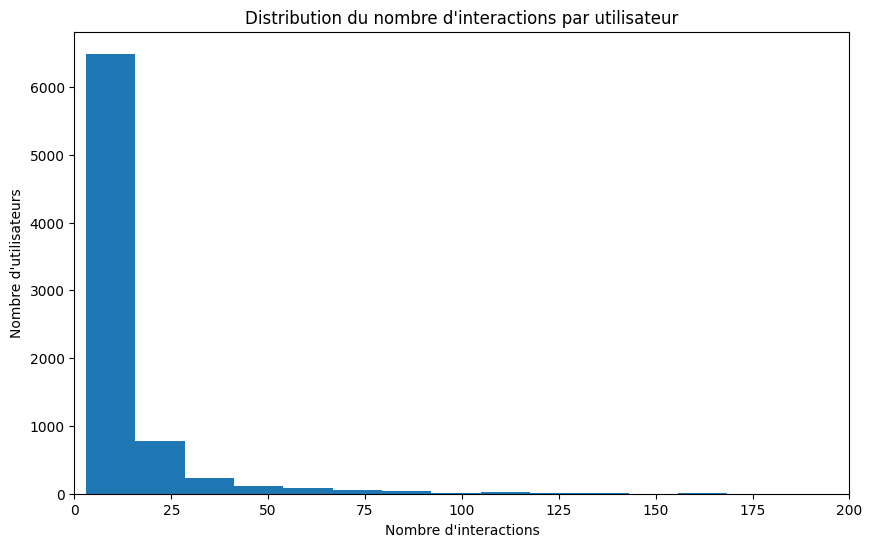

In [ ]:
#Distribution des interactions par utilisateurs
import matplotlib.pyplot as plt

# Compter le nombre d'interactions par utilisateur
user_interactions_count = df_interactions_train['user_id'].value_counts()

# Visualiser la distribution des interactions par utilisateur
plt.figure(figsize=(10, 6))
user_interactions_count.plot(kind='hist', bins=30)
plt.title("Distribution du nombre d'interactions par utilisateur")
plt.xlabel("Nombre d'interactions")
plt.ylabel("Nombre d'utilisateurs")
plt.xlim(0, 200)
plt.show()

In [ ]:
# Interprétation :
# Ce graphique montre que la majorité des utilisateurs ont un nombre limité d'interactions, avec une forte concentration en dessous de 50 interactions.
# Quelques utilisateurs sont nettement plus actifs, avec des interactions dépassant les 300.
# Cette distribution de longue traîne suggère que la plupart des utilisateurs sont peu actifs, ce qui pourrait influencer le choix d'algorithmes de recommandation en tenant compte des besoins des utilisateurs moins fréquents.

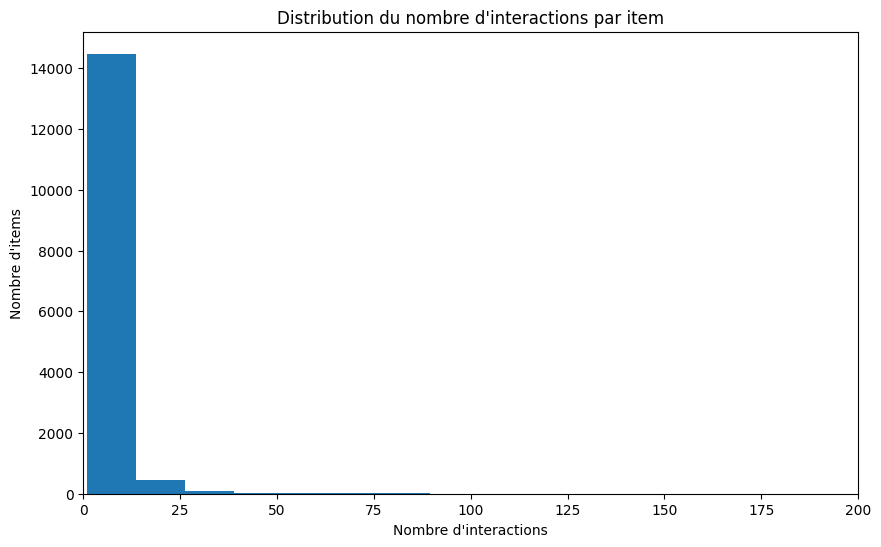

In [ ]:
#Distribution des interactions par item
# Compter le nombre d'interactions par item
item_interactions_count = df_interactions_train['item_id'].value_counts()

# Visualiser la distribution des interactions par item
plt.figure(figsize=(10, 6))
item_interactions_count.plot(kind='hist', bins=30)
plt.title("Distribution du nombre d'interactions par item")
plt.xlabel("Nombre d'interactions")
plt.ylabel("Nombre d'items")
plt.xlim(0, 200)
plt.show()

In [ ]:
# Interprétation :
# Ce graphique montre que la plupart des items (livres) ont très peu d'interactions, tandis que quelques-uns sont beaucoup plus populaires, avec des pics allant jusqu'à plus de 300 interactions.
# Cela indique une distribution typique de longue traîne, où une minorité d'items attire la majorité des interactions.
# Ce phénomène est important pour le modèle de recommandation, car il faudra adapter les algorithmes pour bien gérer la rareté des interactions.

Analyse des sujets et auteurs dans le dataset des items





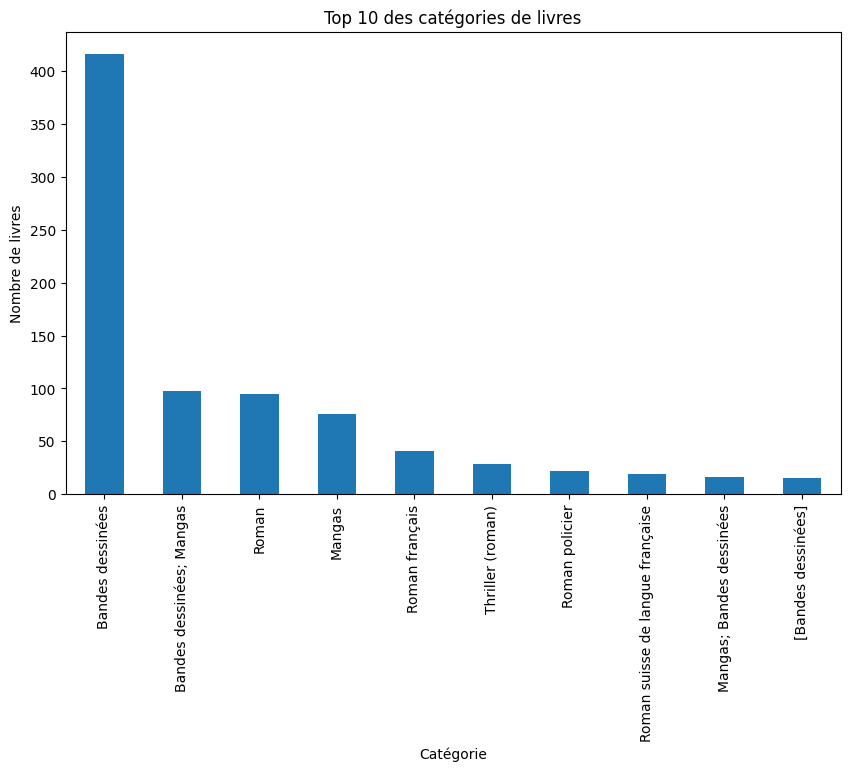

In [ ]:
#Analyse des catégories de livres

# Vérifier la présence de la colonne 'Subjects' et analyser les catégories
if 'Category' in df_items.columns:
    # Compter les catégories les plus fréquentes
    subjects_counts = df_items['Category'].value_counts().head(10)

    # Visualiser les catégories les plus fréquentes
    plt.figure(figsize=(10, 6))
    subjects_counts.plot(kind='bar')
    plt.title("Top 10 des catégories de livres")
    plt.xlabel("Catégorie")
    plt.ylabel("Nombre de livres")
    plt.show()

    # Interprétation :
    # Ce graphique montre les 10 catégories de livres les plus populaires. Ces informations peuvent aider
    # à identifier les sujets d'intérêt pour les utilisateurs et à ajuster le modèle en conséquence.
else:
    print("La colonne 'Subjects' n'est pas présente dans le dataset des items.")

In [ ]:
# Interprétation :
# Les bandes dessinées dominent avec environ 400 livres, suivies des mangas à environ 100 livres.
# Cette popularité des catégories pourrait influencer les recommandations, car il serait pertinent de prioriser ces genres pour les utilisateurs intéressés.
# La distribution montre une préférence pour des genres spécifiques, ce qui est utile pour construire des filtres basés sur les préférences des utilisateurs.

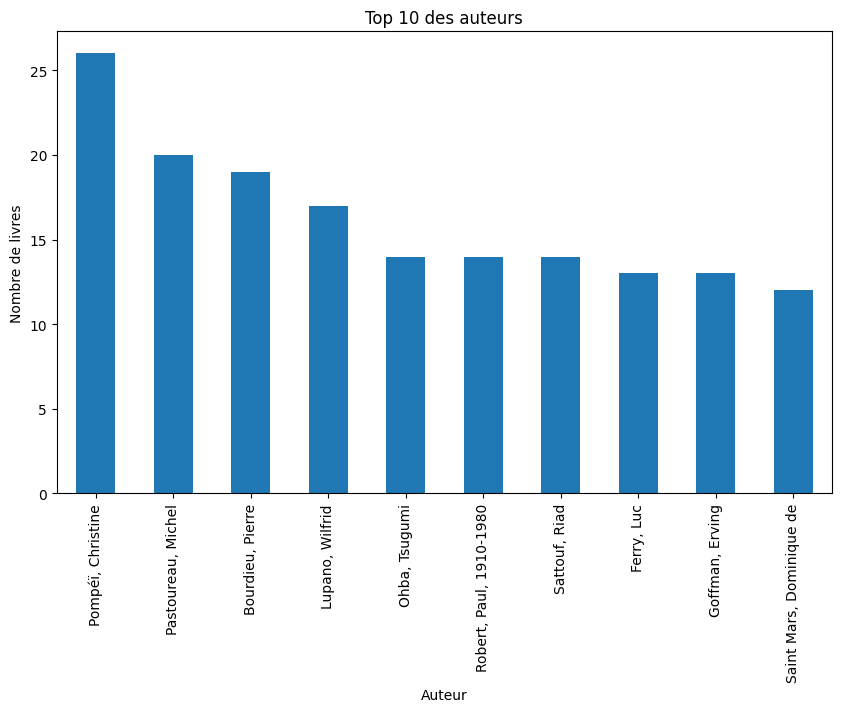

In [ ]:
#Analyse des auteurs

# Vérifier la présence de la colonne 'Author' et analyser les auteurs
if 'Author' in df_items.columns:
    # Compter les auteurs les plus fréquents
    author_counts = df_items['Author'].value_counts().head(10)

    # Visualiser les auteurs les plus fréquents
    plt.figure(figsize=(10, 6))
    author_counts.plot(kind='bar')
    plt.title("Top 10 des auteurs")
    plt.xlabel("Auteur")
    plt.ylabel("Nombre de livres")
    plt.show()

    # Interprétation :
    # Ce graphique montre les 10 auteurs les plus représentés dans le dataset.
    # Cela peut indiquer une préférence pour certains auteurs et pourrait influencer les recommandations
    # pour les utilisateurs qui suivent des auteurs spécifiques.
else:
    print("La colonne 'Author' n'est pas présente dans le dataset des items.")

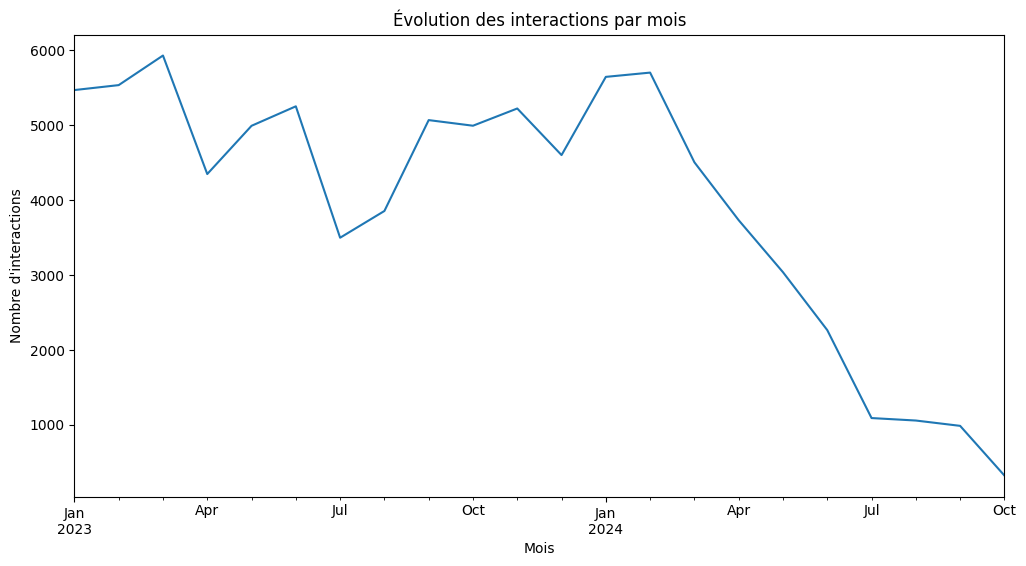

In [ ]:
# Analyse temporelle des interactions (est ce qu'il y a des tendances saisonnières ou des pics d'activités?)

# Visualiser la distribution des interactions au fil du temps
df_interactions_train['datetime'].groupby(df_interactions_train['datetime'].dt.to_period("M")).count().plot(kind='line', figsize=(12, 6))
plt.title("Évolution des interactions par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre d'interactions")
plt.show()

# Interprétation :
# Ce graphique montre l'évolution des interactions par mois. Les pics ou tendances spécifiques au fil du temps
# pourraient révéler des périodes de haute activité, utiles pour comprendre le comportement des utilisateurs
# et ajuster les recommandations en fonction de la saisonnalité.

In [ ]:
# Interprétation :
# Ce graphique montre une baisse progressive des interactions sur la période affichée, avec des pics d'activité autour de janvier et octobre 2023 et une forte diminution ensuite.
# Cette tendance pourrait refléter des changements saisonniers ou des événements spécifiques qui influencent l’utilisation de la bibliothèque.
# Cela pourrait également signifier une diminution de l'engagement des utilisateurs avec le temps, un facteur à prendre en compte dans les recommandations.

# 3. Dataset splitting


In [ ]:
df_interactions = df_interactions_train.sort_values(["user_id", "datetime"])
df_interactions.head(10)

,user_id,item_id,datetime
21035,0,0,2023-03-30 15:44:30
28842,0,1,2023-04-06 12:13:54
3958,0,2,2023-04-06 17:15:08
29592,0,3,2023-05-10 10:35:45
6371,0,3,2023-05-10 10:35:50
41220,0,4,2023-06-12 11:20:35
12217,0,5,2023-06-17 14:59:04
19703,0,6,2023-06-17 14:59:24
64522,0,7,2023-06-17 14:59:31
29380,0,8,2023-06-20 11:21:46


In [ ]:
# Calculer le rang en pourcentage des interactions pour chaque utilisateur
df_interactions["pct_rank"] = df_interactions.groupby("user_id")["datetime"].rank(pct=True, method='dense')
df_interactions.reset_index(drop=True, inplace=True)
df_interactions.head(10)

,user_id,item_id,datetime,pct_rank
0,0,0,2023-03-30 15:44:30,0.04
1,0,1,2023-04-06 12:13:54,0.08
2,0,2,2023-04-06 17:15:08,0.12
3,0,3,2023-05-10 10:35:45,0.16
4,0,3,2023-05-10 10:35:50,0.20
5,0,4,2023-06-12 11:20:35,0.24
6,0,5,2023-06-17 14:59:04,0.28
7,0,6,2023-06-17 14:59:24,0.32
8,0,7,2023-06-17 14:59:31,0.36
9,0,8,2023-06-20 11:21:46,0.40


In [ ]:
# Créer les ensembles d’entraînement et de test
train_data = df_interactions[df_interactions["pct_rank"] < 0.8]
test_data = df_interactions[df_interactions["pct_rank"] >= 0.8]

# Afficher les tailles des ensembles
print("Training set size:", train_data.shape[0])
print("Testing set size:", test_data.shape[0])

Training set size: 65417
Testing set size: 21628


# 3. Pré-traitement des données:


Creation de la matrice utilisateur-item:

In [ ]:
import numpy as np

# Fonction pour créer la matrice de données
def create_data_matrix(data, n_users, n_items):
    """
    Cette fonction retourne une matrice numpy de forme (n_users, n_items).
    Chaque entrée est une valeur binaire indiquant une interaction positive.
    """
    data_matrix = np.zeros((n_users, n_items))
    data_matrix[data["user_id_encoded"].values, data["item_id_encoded"].values] = 1
    return data_matrix


NameError: name 'data' is not defined

Matrice d'entrainement:


In [ ]:
# Définir le nombre d’utilisateurs et d’items uniques
n_users = df_interactions_train['user_id_encoded'].nunique()
n_items = df_interactions_train['item_id_encoded'].nunique()

# Créer les matrices d'entraînement et de test
train_data_matrix = create_data_matrix(train_data, n_users, n_items)
test_data_matrix = create_data_matrix(test_data, n_users, n_items)

# Afficher les matrices pour comprendre leur structure
print('train_data_matrix')
print(train_data_matrix)
print("Nombre de valeurs non nulles :", np.sum(train_data_matrix))
print('test_data_matrix')
print(test_data_matrix)
print("Nombre de valeurs non nulles :", np.sum(test_data_matrix))


KeyError: 'user_id_encoded'

Heatmap:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction pour tracer une heatmap d'un sous-ensemble de la matrice utilisateur-item
def plot_interaction_heatmap(data_matrix, title, num_users=50, num_items=50):
    """
    Trace une heatmap d'un sous-ensemble de la matrice d'interaction utilisateur-item.
    Paramètres:
        data_matrix: La matrice à visualiser.
        title: Le titre du graphique.
        num_users: Nombre d'utilisateurs à afficher (lignes).
        num_items: Nombre d'items à afficher (colonnes).
    """
    # Extraire un sous-ensemble de la matrice pour visualisation
    matrix_subset = data_matrix[:num_users, :num_items]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="YlGnBu", cbar=True, cbar_kws={'label': 'Interaction (1 = Positive, 0 = None)'})
    plt.xlabel('Item ID')
    plt.ylabel('User ID')
    plt.title(title)
    plt.show()

# Visualiser un sous-ensemble des matrices d'entraînement et de test
plot_interaction_heatmap(train_data_matrix, 'User-Item Interaction Matrix (Train Data)')
plot_interaction_heatmap(test_data_matrix, 'User-Item Interaction Matrix (Test Data)')


NameError: name 'train_data_matrix' is not defined

# 3.1 Filtrage collaboratif

Calcul de la similarité entre item:

In [ ]:
#from sklearn.metrics.pairwise import cosine_similarity
#import pandas as pd

# Calcul de la similarité entre items en utilisant la similarité cosinus
#item_similarity_matrix = cosine_similarity(user_item_matrix.T)

# Transformer en DataFrame pour plus de lisibilité
#item_similarity_df = pd.DataFrame(item_similarity_matrix, index=user_item_matrix.columns, columns=user_item_matrix.columns)

# Afficher un aperçu de la matrice de similarité entre items
#print("Matrice de similarité entre items :")
#print(item_similarity_df.head())

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Calcul de la similarité entre items en utilisant la similarité cosinus
item_similarity_matrix = cosine_similarity(train_data_matrix.T)

# Transformer en DataFrame pour plus de lisibilité (facultatif)
item_similarity_df = pd.DataFrame(item_similarity_matrix, index=range(train_data_matrix.shape[1]), columns=range(train_data_matrix.shape[1]))

# Afficher un aperçu de la matrice de similarité entre items
print("Matrice de similarité entre items :")
print(item_similarity_df.head())


Heatmap:


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction pour visualiser la matrice de similarité entre items
def plot_item_similarity_heatmap(similarity_matrix, title, num_items=50):
    """
    Trace une heatmap d'un sous-ensemble de la matrice de similarité entre items.
    Paramètres:
        similarity_matrix: La matrice de similarité item-item.
        title: Le titre du graphique.
        num_items: Le nombre d'items à afficher (lignes et colonnes).
    """
    # Extraire un sous-ensemble de la matrice pour la visualisation
    matrix_subset = similarity_matrix[:num_items, :num_items]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="coolwarm", cbar=True, cbar_kws={'label': 'Similarity Score'})
    plt.xlabel('Item ID')
    plt.ylabel('Item ID')
    plt.title(title)
    plt.show()

# Visualiser un sous-ensemble de la matrice de similarité entre items
plot_item_similarity_heatmap(item_similarity_matrix, 'Matrice de Similarité entre Items')



User - Item prediction matrix

In [ ]:
import numpy as np

# Fonction pour prédire les interactions en se basant sur la similarité item-item
def item_based_predict(interactions, similarity, epsilon=1e-9):
    """
    Prédit les scores d'interaction utilisateur-item en se basant sur la similarité entre items.

    Paramètres :
        interactions (numpy array): Matrice d'interaction utilisateur-item.
        similarity (numpy array): Matrice de similarité entre items.
        epsilon (float): Petite constante ajoutée au dénominateur pour éviter la division par zéro.

    Retourne :
        numpy array: Les scores prédits pour chaque paire utilisateur-item.
    """
    # Calcul de la somme pondérée des interactions basée sur la similarité des items
    pred = similarity.dot(interactions.T) / (similarity.sum(axis=1)[:, np.newaxis] + epsilon)
    return pred.T  # Transposer pour obtenir les utilisateurs en lignes et les items en colonnes

# Calculer les prédictions d'interactions positives basées sur la similarité item-item
item_prediction = item_based_predict(train_data_matrix, item_similarity_matrix)
print("Matrice des Interactions Prédites :")
print(item_prediction)
print(item_prediction.shape)


Heatmap:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction pour visualiser la matrice des interactions prédites pour un sous-ensemble d'utilisateurs et d'items
def plot_interaction_prediction_heatmap(prediction_matrix, title, num_users=50, num_items=50):
    """
    Trace une heatmap d'un sous-ensemble de la matrice des interactions utilisateur-item prédites.

    Paramètres :
        prediction_matrix : numpy array, la matrice des interactions prédites.
        title : str, le titre du graphique.
        num_users : int, le nombre d'utilisateurs à afficher (lignes).
        num_items : int, le nombre d'items à afficher (colonnes).
    """
    # Extraire un sous-ensemble de la matrice pour la visualisation
    matrix_subset = prediction_matrix[:num_users, :num_items]

    # Création de la heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="YlGnBu", cbar=True, cbar_kws={'label': 'Predicted Interaction Score'})
    plt.xlabel('Item ID')
    plt.ylabel('User ID')
    plt.title(title)
    plt.show()

# Visualiser un sous-ensemble de la matrice des interactions prédites
plot_interaction_prediction_heatmap(item_prediction, 'Matrice des Interactions Prédites Utilisateur-Item')


Fonction de recommendation utilisateur - utilisateur :

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Calcul de la similarité entre utilisateurs en utilisant la similarité cosinus
user_similarity_matrix = cosine_similarity(train_data_matrix)

# Transformer en DataFrame pour une meilleure lisibilité
user_similarity_df = pd.DataFrame(user_similarity_matrix, index=range(train_data_matrix.shape[0]), columns=range(train_data_matrix.shape[0]))

# Afficher un aperçu de la matrice de similarité entre utilisateurs
print("Matrice de similarité entre utilisateurs :")
print(user_similarity_df.head())

# Vérifier la forme de la matrice
print("Forme de la Matrice de Similarité Utilisateur-Utilisateur :", user_similarity_matrix.shape)


Heatmap:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction pour visualiser la matrice de similarité entre utilisateurs
def plot_user_similarity_heatmap(similarity_matrix, title, num_users=50):
    """
    Trace une heatmap d'un sous-ensemble de la matrice de similarité entre utilisateurs.

    Paramètres :
        similarity_matrix : numpy array, la matrice de similarité utilisateur-utilisateur.
        title : str, le titre du graphique.
        num_users : int, le nombre d'utilisateurs à afficher (lignes et colonnes).
    """
    # Extraire un sous-ensemble de la matrice pour la visualisation
    matrix_subset = similarity_matrix[:num_users, :num_users]

    # Création de la heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="coolwarm", cbar=True, cbar_kws={'label': 'Similarity Score'})
    plt.xlabel('User ID')
    plt.ylabel('User ID')
    plt.title(title)
    plt.show()

# Visualiser un sous-ensemble de la matrice de similarité entre utilisateurs
plot_user_similarity_heatmap(user_similarity_matrix, 'Matrice de Similarité Utilisateur-Utilisateur')


Predict Positive Interactions Using User Similarity:

In [ ]:
import numpy as np

# Fonction pour prédire les interactions en se basant sur la similarité utilisateur-utilisateur
def user_based_predict(interactions, similarity, epsilon=1e-9):
    """
    Prédit les scores d'interaction utilisateur-item en se basant sur la similarité entre utilisateurs.

    Paramètres :
        interactions : numpy array, matrice d'interaction utilisateur-item.
        similarity : numpy array, matrice de similarité utilisateur-utilisateur.
        epsilon : float, petite constante ajoutée au dénominateur pour éviter la division par zéro.

    Retourne :
        numpy array : les scores prédits pour chaque paire utilisateur-item.
    """
    # Calcul de la somme pondérée des interactions basée sur la similarité utilisateur-utilisateur
    pred = similarity.dot(interactions) / (np.abs(similarity).sum(axis=1)[:, np.newaxis] + epsilon)
    return pred

# Calculer les prédictions d'interactions positives basées sur la similarité utilisateur-utilisateur
user_prediction = user_based_predict(train_data_matrix, user_similarity_matrix)
print("Matrice des Interactions Prédites (Basée sur les Utilisateurs) :")
print(user_prediction)
print("Forme de la Matrice des Interactions Prédites :", user_prediction.shape)


Heatmap:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction pour visualiser la matrice des interactions prédites pour un sous-ensemble d'utilisateurs et d'items
def plot_interaction_prediction_heatmap(prediction_matrix, title, num_users=50, num_items=50):
    """
    Trace une heatmap d'un sous-ensemble de la matrice des interactions utilisateur-item prédites.

    Paramètres :
        prediction_matrix : numpy array, la matrice des interactions prédites.
        title : str, le titre du graphique.
        num_users : int, le nombre d'utilisateurs à afficher (lignes).
        num_items : int, le nombre d'items à afficher (colonnes).
    """
    # Extraire un sous-ensemble de la matrice pour la visualisation
    matrix_subset = prediction_matrix[:num_users, :num_items]

    # Création de la heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="YlGnBu", cbar=True, cbar_kws={'label': 'Predicted Interaction Score'})
    plt.xlabel('Item ID')
    plt.ylabel('User ID')
    plt.title(title)
    plt.show()

# Visualiser un sous-ensemble de la matrice des interactions prédites
plot_interaction_prediction_heatmap(user_prediction, 'Matrice des Interactions Prédites Utilisateur-Item (Basée sur les Utilisateurs)')


# Calcul précison et recall:

Evalutation des modèles:

2. Data cleaning : Address any missing or inconsistent data. Consider handling outliers, duplicates, or irrelevant records (e.g., users with too few rentals).

3. Additional features: genre frequency, author popularity and book ratings. Perform exploratory data analysis (EDA) to understand patterns, such as book popularity trends.

4. Modeling and recommendations techniques :
  4.1 Collaborative filtering
User-User CF: Recommend books based on similarity between users with similar rental histories.

Item-Item CF: Recommend books similar to items a user has previously rented.

Implement both techniques and evaluate them using the Precision@10 and Recall@10 metrics.

4.2 Content based filtering: Use metadata, such as book title, author, and genre, to create text embeddings (e.g., using BERT or OpenAI models). This approach can recommend items similar to the ones a user has rented.

4.3 Hyybrid approach: Combine collaborative and content-based methods to improve recommendations by balancing personalization with general popularity.

5. Data Augmentation

  5.1 integrate external Data: Use APIs like Google Books to enrich metadata (e.g., book synopsis, reviews, and author background). This can improve the model’s understanding of items.

  5.2 Embeddings Initialization: Use augmented metadata to create embeddings for each book, enhancing item representations in your model.